# Demonstration

## Shop Customer Data
Data set found https://www.kaggle.com/datasets/datascientistanna/customers-dataset?resource=download

### Importing Modules/Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns

## Importing Data Set

In [2]:
# Importing csv data set about shop customer data
df = pd.read_csv("Data/Customers.csv")

### Code for better viewing

In [3]:
#  Shows *all* columns in dataframe
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard from and rounds to two decimal places
pd.set_option('display.float_format', lambda x : "%.2f" % x)

### Exploring Data

In [4]:
# Running df.head to see data set top 5
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
# Running df.describe to see statistics information
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,48.96,110731.82,50.96,4.10,3.77
std,577.49,28.43,45739.54,27.93,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,500.75,25.00,74572.00,28.00,1.00,2.00
50%,1000.50,48.00,110045.00,50.00,3.00,4.00
75%,1500.25,73.00,149092.75,75.00,7.00,5.00
max,2000.00,99.00,189974.00,100.00,17.00,9.00


for now there only seems to be to outliers that are in the data set of the 0 age or newborn and a individual who is 99 years old will check to see the count on those two ages everything else seems to make sense

In [6]:
# Running df info to see column names, datatypes and possible nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


there seems to be some null values in profession

In [7]:
# checking for null values 
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

35 professions are of null values

In [8]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [9]:
# Checking the null values in Profession

df.loc[(df["Profession"]!= "Artist") & (df["Profession"]!= "Healthcare") & (df["Profession"]!="Engineer") &
      (df["Profession"]!= "Lawyer") & (df["Profession"]!= "Doctor") & (df["Profession"]!= "Executive")
      & (df["Profession"]!= "Marketing") & (df["Profession"]!= "Homemaker") & (df["Profession"]!= "Entertainment")]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


The null values in profession still seem to have a spending score so for now will keep in the data set

In [10]:
# checking for age = 0
df.loc[(df["Age"] == 0)]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,NaN,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


There seems to be twenty four counts of age being zero where it seems these individuals are still making money and is more than likely a input error than user age actually being zero for now will keep in data set

In [11]:
# for sanity sake checking to see if there are more errors in age with a minimum age of 18
df.loc[(df["Age"] < 18)]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
202,203,Female,16,60000,0,Engineer,6,8
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
229,230,Male,15,94000,30,Healthcare,7,2
...,...,...,...,...,...,...,...,...
1974,1975,Female,14,153145,59,Healthcare,8,6
1979,1980,Male,0,165321,93,Doctor,8,1
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6


There seems to be more 332 rows individuals are stated to be under 18 making tremendous amounts of money.
Its more than likely that there is an error in the input of entering age

In [12]:
# check for users at the age of 99 
df.loc[(df["Age"] == 99)]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
347,348,Female,99,184426,41,Artist,9,1
351,352,Male,99,173394,4,Engineer,13,1
361,362,Male,99,63364,61,Entertainment,1,2
546,547,Male,99,164781,83,Engineer,0,2
567,568,Female,99,172896,13,Engineer,0,3
937,938,Female,99,56851,72,Entertainment,6,3
1016,1017,Female,99,55972,83,Entertainment,1,7
1019,1020,Female,99,145777,94,Executive,1,5
1103,1104,Female,99,103706,50,Entertainment,1,2
1133,1134,Female,99,57677,99,Lawyer,0,5


more than a couple of users at the age of 99 possible error for user 1134 with zero years of experience as lawyer making 57000

In [13]:
#  check if there are any duplicates in customer id
df["CustomerID"].duplicated().sum()

0

There seems to be no duplicates in customer id and every other column there are possibilities of duplicates

Depending on how we are comparing data we might not need to remove any rows, but if we are doing an analysis on profession and their spending scores there might be a need to remove the null values.

In [14]:
# Making a copy of dataframe so not to alter the original dataframe
df_copy = df.copy()

In [15]:
# Removing null values in Profession and fitting it in another dataframe
df_copy_clean_Profession=df_copy.loc[(df_copy["Profession"].notnull())]

In [16]:
df_copy_clean_Profession

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [17]:
# Checking again to see it there are any outliers
df_copy_clean_Profession["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

## Exploring Data

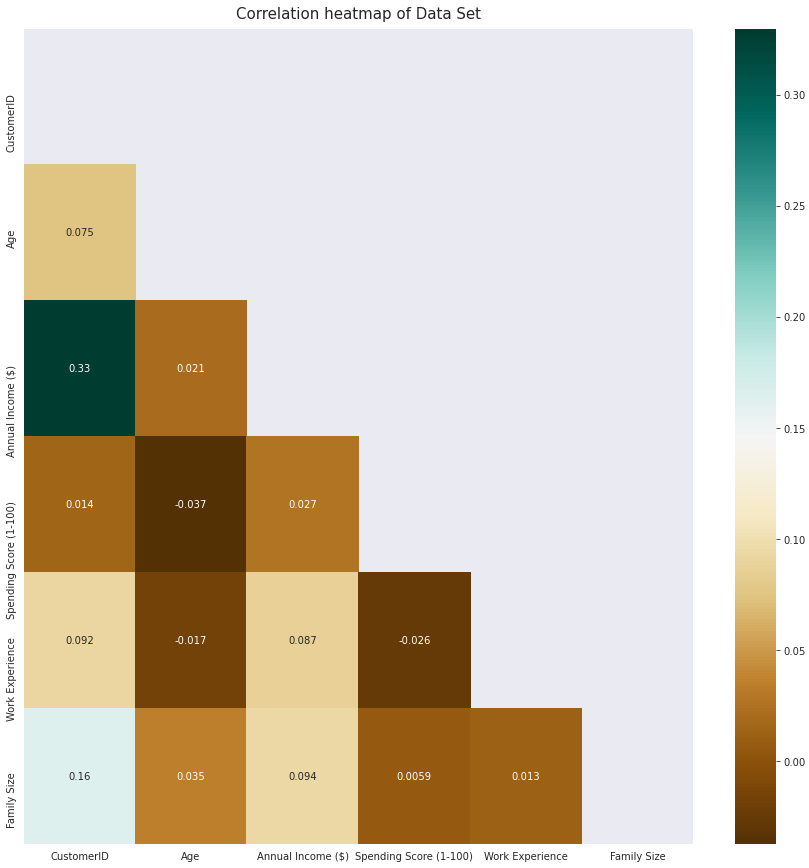

In [18]:
# Check to see if there are any correlations between the numerical values  of the dataset especially with those pertaining 
# to spending score

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize = (15,15))
    mask = np.triu(np.ones_like(df_copy_clean_Profession.corr(), dtype = np.bool))
    heatmap = sns.heatmap(df_copy_clean_Profession.corr(), annot = True, mask = mask, cmap = "BrBG");
    
    heatmap.set_title ('Correlation heatmap of Data Set', fontdict = {"fontsize" : 15}, pad = 10)

there doesn't seem to be much correlation with any of the numerical data with spending score and seem pretty random with annual income coming in with the highest correlation at .027 which is extremely low

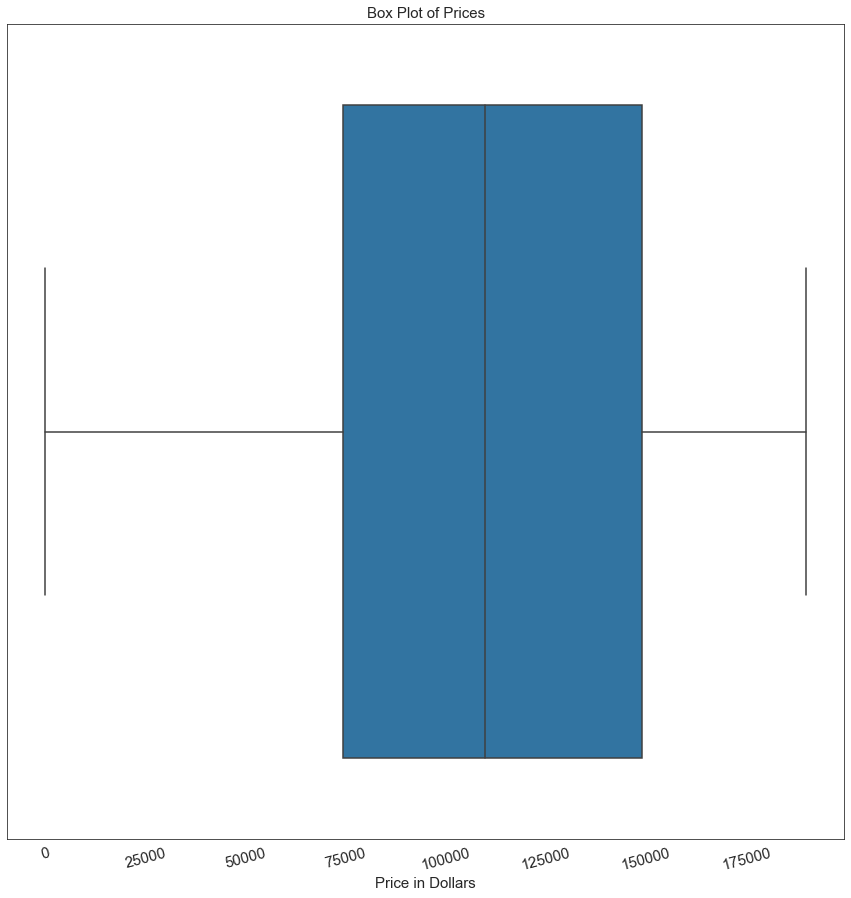

In [19]:
# Boxplot of Annual Income

sns.set_style("white")

fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(x=df_copy_clean_Profession["Annual Income ($)"])

ax.set_title("Box Plot of Prices", fontsize = 15)
ax.set_xlabel("Price in Dollars", fontsize  = 15)

plt.ticklabel_format(style = "plain", axis = "x")

plt.xticks(rotation = 15, fontsize = 15)

plt.show()

show where most of the customers fall in between 75,000 and 150000

In [20]:
#  get average spending score per profession
df_clean_profession_mean = df_copy_clean_Profession.groupby('Profession').mean().reset_index()
df_clean_profession_mean

,Profession,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Artist,994.03,49.00,108776.58,52.68,4.22,3.65
1,Doctor,1010.57,46.62,111573.22,51.90,4.30,3.67
2,Engineer,935.69,55.09,111161.24,48.97,3.96,3.58
3,Entertainment,1061.17,51.16,110650.33,52.94,3.50,3.89
4,Executive,1072.25,46.60,113770.13,49.90,4.25,3.97
5,Healthcare,970.88,47.84,112574.04,50.52,4.00,3.91
6,Homemaker,1022.92,45.37,108758.62,46.38,6.13,4.05
7,Lawyer,957.40,47.75,110995.84,48.86,3.53,3.62
8,Marketing,1038.21,45.82,107994.21,48.72,4.31,3.73


Average break down of the numerical numbers of the customers by profession

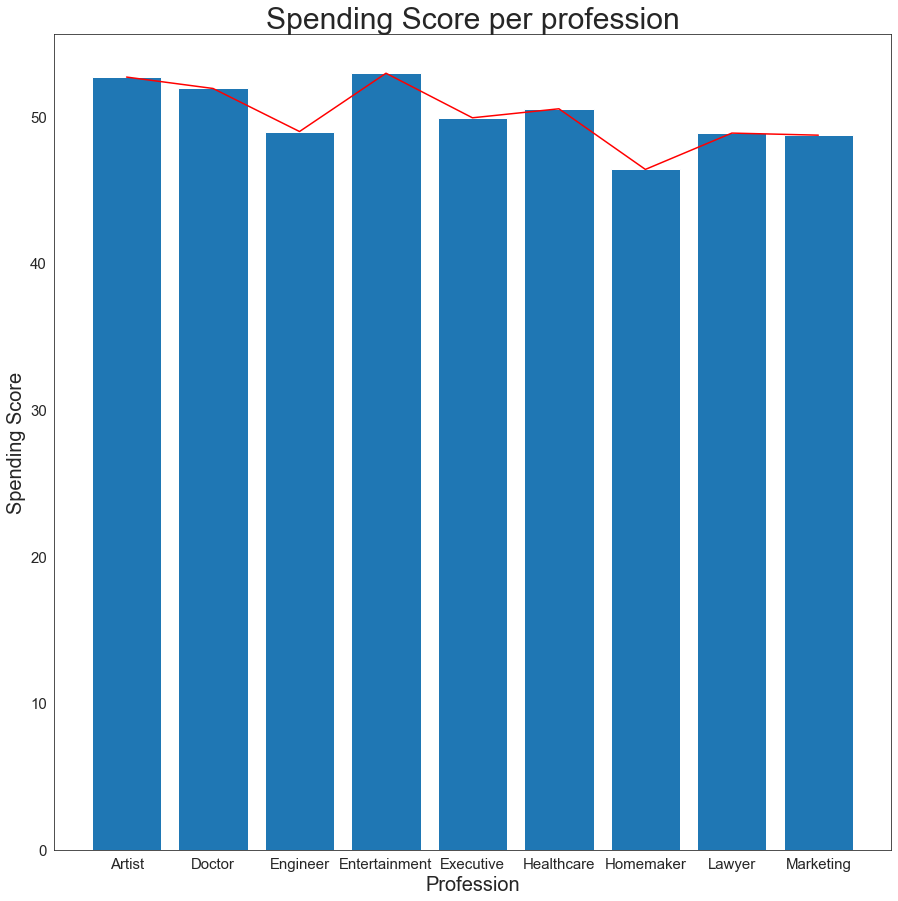

In [21]:
# barchart of spending score and profession

fig, ax = plt.subplots(figsize = (15, 15))

x= df_clean_profession_mean.Profession
y = df_clean_profession_mean["Spending Score (1-100)"]

plt.plot(df_clean_profession_mean['Profession'],df_clean_profession_mean["Spending Score (1-100)"], color = "red")

ax.bar(x,y)
ax.set_xlabel("Profession", fontsize = 20)
ax.set_ylabel("Spending Score", fontsize = 20)
ax.set_title("Spending Score per profession", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

There doesn't seem to be much fluctuation between the average spending score and the profession of the individual

In [22]:
# getting average spending score per age
df_clean_age_mean = df_copy_clean_Profession.groupby('Age').mean().reset_index()
df_clean_age_mean

,Age,CustomerID,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,0,1060.09,117714.52,57.26,4.13,3.96
1,1,1128.76,112230.60,54.20,3.88,3.52
2,2,1328.27,115497.60,59.20,4.47,4.40
3,3,919.94,122450.50,48.11,3.72,2.83
4,4,1091.40,120743.27,54.93,4.27,4.13
...,...,...,...,...,...,...
95,95,1202.68,108909.63,45.42,3.79,3.42
96,96,1154.18,115824.27,48.55,4.05,4.41
97,97,1224.09,131496.45,57.64,5.36,4.59
98,98,1341.67,102939.44,47.00,3.44,4.00


Average break down of customer data by age

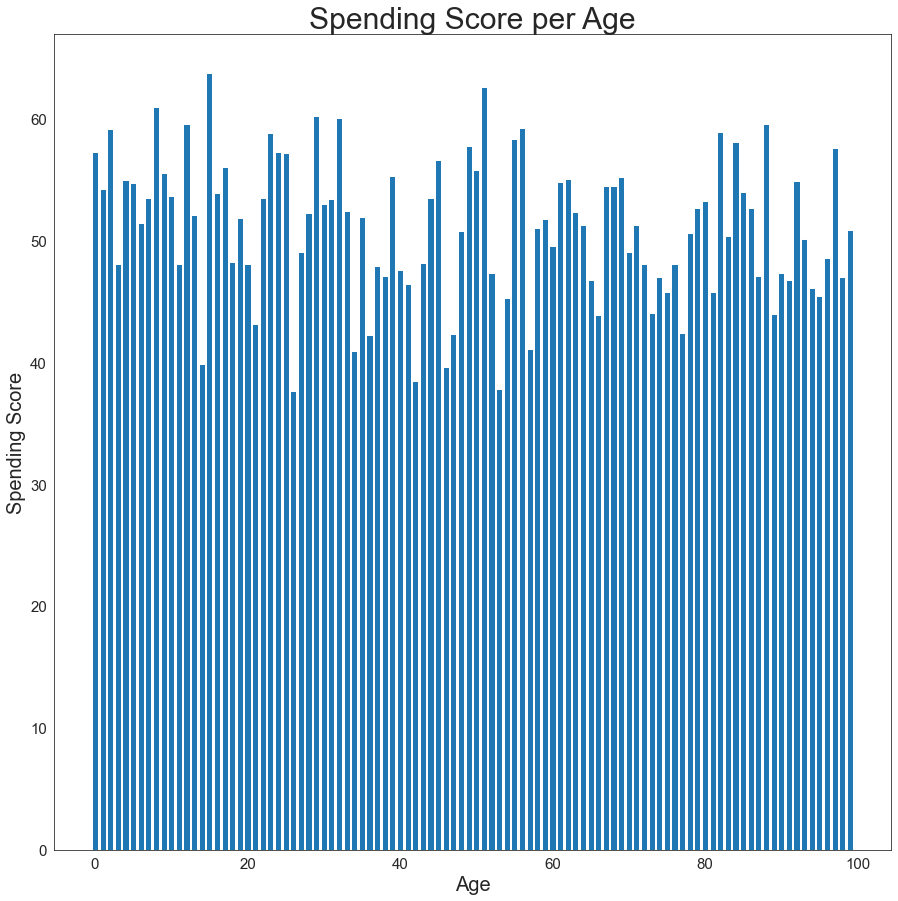

In [23]:
# barchart of spending score and profession

fig, ax = plt.subplots(figsize = (15, 15))

x= df_clean_age_mean["Age"]
y = df_clean_age_mean["Spending Score (1-100)"]

ax.bar(x,y)
ax.set_xlabel("Age", fontsize = 20)
ax.set_ylabel("Spending Score", fontsize = 20)
ax.set_title("Spending Score per Age", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

There doesn't seem to any pattern between spending score and age even though we know that there is a possibility of error for some of the early ages.

In [24]:
df_clean_work_mean = df_copy_clean_Profession.groupby('Work Experience').mean().reset_index()
df_clean_work_mean

,Work Experience,CustomerID,Age,Annual Income ($),Spending Score (1-100),Family Size
0,0,947.28,50.87,106244.09,51.21,3.76
1,1,901.05,47.54,107632.83,50.89,3.70
2,2,719.75,46.52,105828.75,56.89,3.48
3,3,751.96,46.89,113240.98,58.70,3.62
4,4,1126.37,52.69,113905.64,50.35,3.83
5,5,1117.99,50.83,104687.57,49.13,3.79
6,6,1127.82,45.07,117911.66,55.00,3.78
7,7,1183.56,49.94,111434.19,50.52,3.98
8,8,1095.35,45.99,115138.99,50.88,3.62
9,9,1133.61,49.02,114076.91,46.06,3.97


Average break down of customer information by work experience

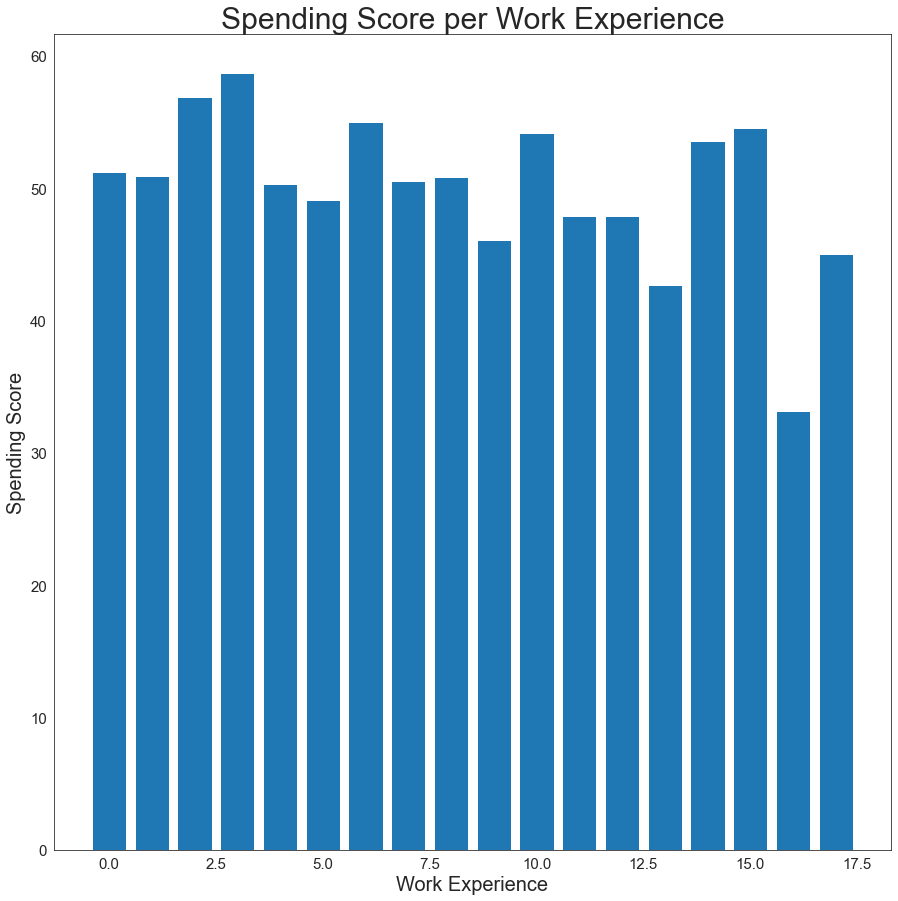

In [25]:
# bar chart of work experience

fig, ax = plt.subplots(figsize = (15, 15))

x= df_clean_work_mean["Work Experience"]
y = df_clean_work_mean["Spending Score (1-100)"]

ax.bar(x,y)
ax.set_xlabel("Work Experience", fontsize = 20)
ax.set_ylabel("Spending Score", fontsize = 20)
ax.set_title("Spending Score per Work Experience", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

there doesn't seem to be much correlation with work experience and spending score, but there is a noticeable dip in the 16th year

In [26]:
df_clean_family_mean = df_copy_clean_Profession.groupby('Family Size').mean().reset_index()
df_clean_family_mean

,Family Size,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience
0,1,935.60,47.09,108720.57,49.62,4.11
1,2,874.70,48.70,104455.97,50.51,3.81
2,3,949.41,45.65,106263.39,51.91,4.18
3,4,929.78,52.00,109233.37,52.78,4.26
4,5,1099.95,50.33,114537.33,52.52,4.23
5,6,1171.24,49.91,119161.38,49.89,3.97
6,7,1166.08,50.00,117994.03,50.48,4.16
7,8,217.00,19.00,78607.75,49.25,6.00
8,9,151.00,43.00,30000.00,17.00,0.00


Average numerical break down of customer data per family size

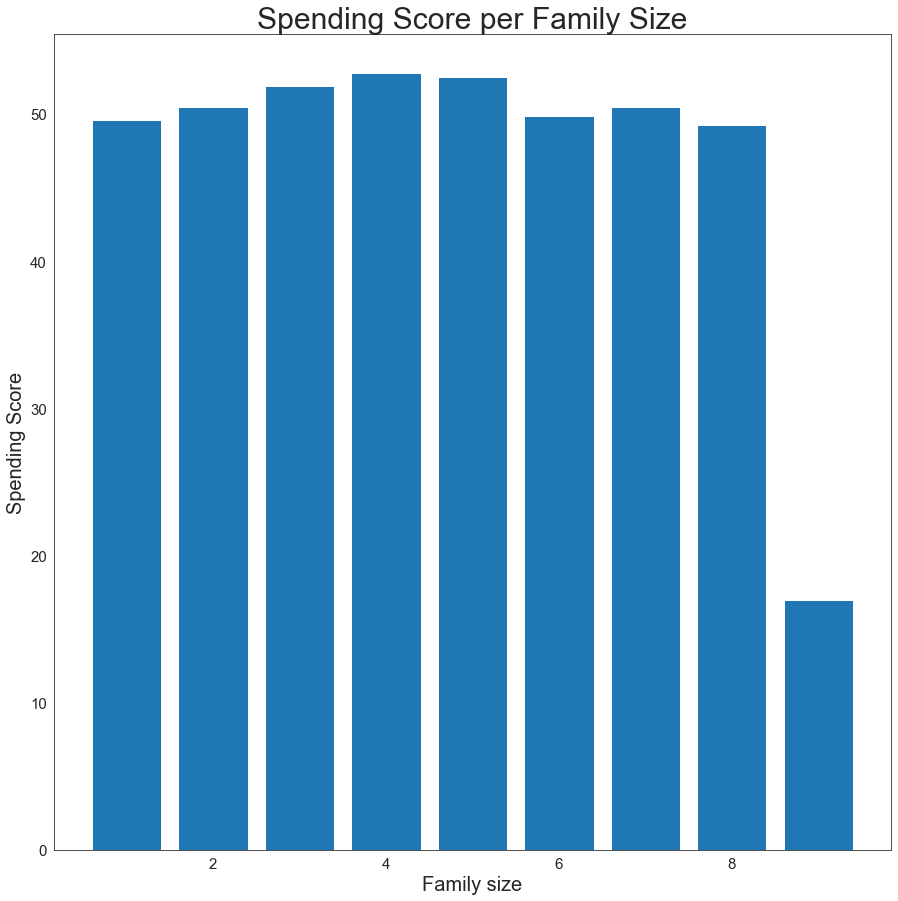

In [27]:
# Spending Score per family size bar chart

fig, ax = plt.subplots(figsize = (15, 15))

x= df_clean_family_mean["Family Size"]
y = df_clean_family_mean["Spending Score (1-100)"]

ax.bar(x,y)
ax.set_xlabel("Family size", fontsize = 20)
ax.set_ylabel("Spending Score", fontsize = 20)
ax.set_title("Spending Score per Family Size", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

Doesn't seem to show anything other than when the family size reaches 9 individuals there is a noticeable decrease in spending score on average

In [30]:
# grouping by gender

df_clean_gender_mean = df_copy_clean_Profession.groupby('Gender').mean().reset_index()
df_clean_gender_mean

,Gender,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Female,995.97,48.91,110434.88,50.99,4.04,3.76
1,Male,1006.64,48.88,110880.34,51.20,4.18,3.75


numerical average based on gender 

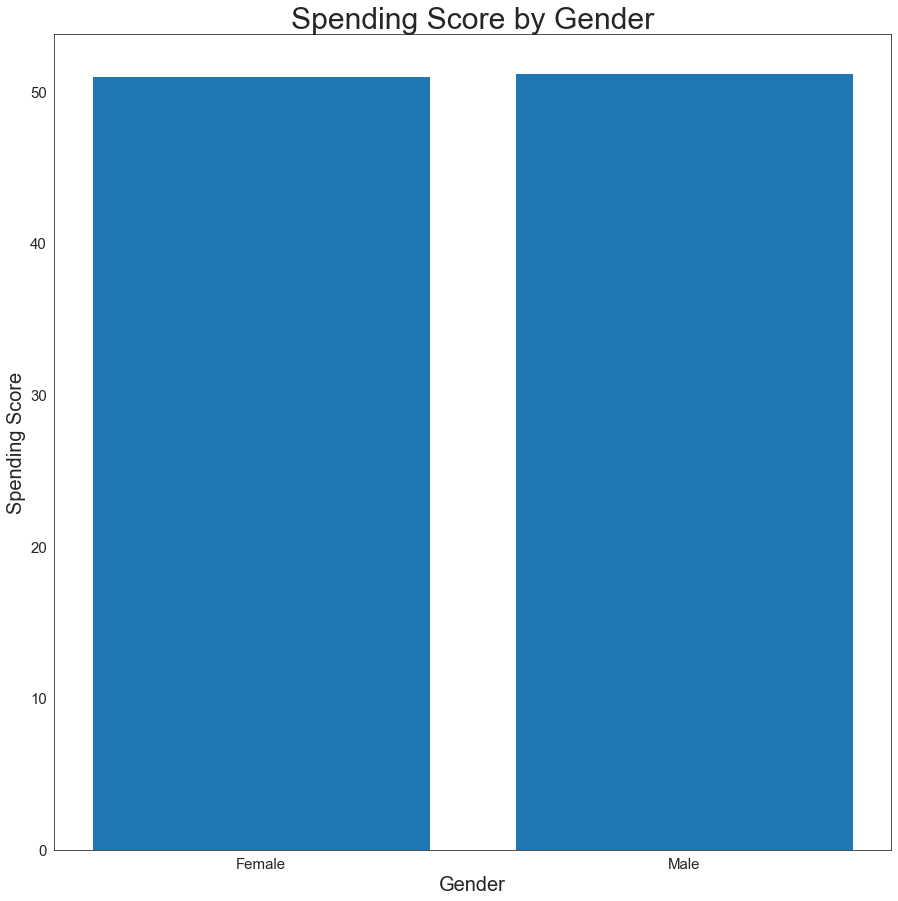

In [32]:
# Spending Score per gender size bar chart

fig, ax = plt.subplots(figsize = (15, 15))

x= df_clean_gender_mean["Gender"]
y = df_clean_gender_mean["Spending Score (1-100)"]

ax.bar(x,y)
ax.set_xlabel("Gender", fontsize = 20)
ax.set_ylabel("Spending Score", fontsize = 20)
ax.set_title("Spending Score by Gender", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

There is almost no difference between the two genders

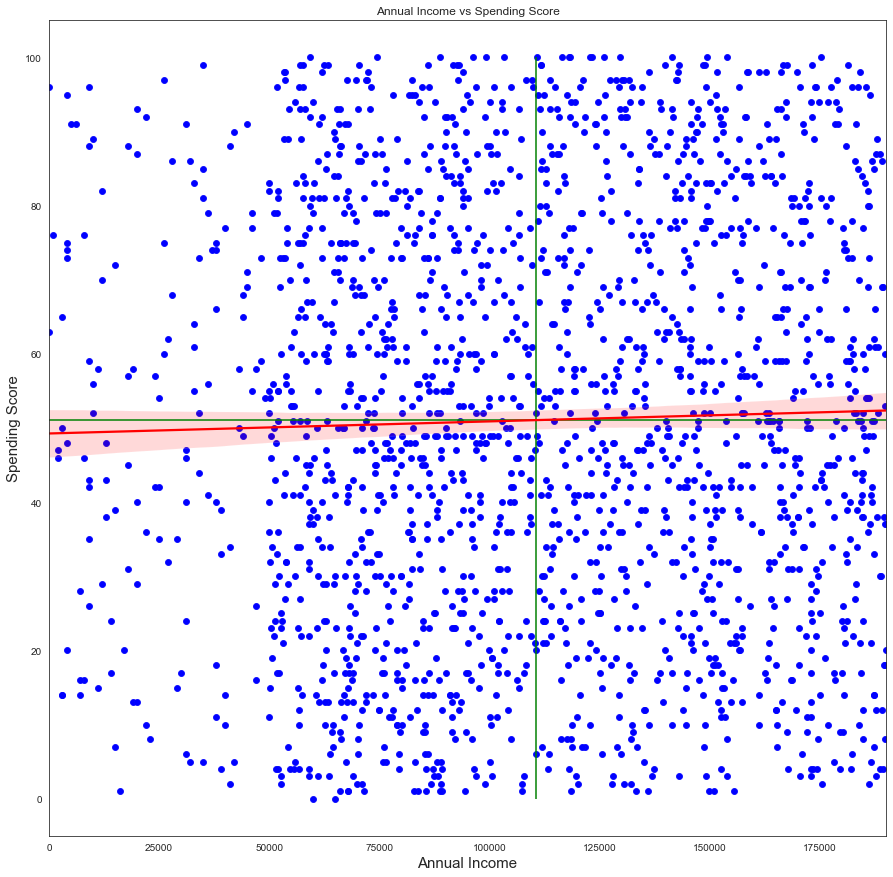

In [29]:
# Scatter plot of annual income vs spending score

fig, ax = plt.subplots(figsize = (15, 15))

sns.scatterplot(x = "Annual Income ($)", y = "Spending Score (1-100)",
                data = df_copy_clean_Profession, color = "blue")
sns.regplot(x = "Annual Income ($)", y = "Spending Score (1-100)", data = df_copy_clean_Profession,
           scatter_kws = {"color" : "blue"}, line_kws = {"color" : "red"})
ax.vlines(df_copy_clean_Profession["Annual Income ($)"].mean(),ymin= df_copy_clean_Profession["Spending Score (1-100)"].min(),
         ymax= df_copy_clean_Profession["Spending Score (1-100)"].max(), color = "green")
ax.hlines(df_copy_clean_Profession["Spending Score (1-100)"].mean(),xmin= df_copy_clean_Profession["Annual Income ($)"].min(),
         xmax= df_copy_clean_Profession["Annual Income ($)"].max(), color = "green")
ax.set_xlabel("Annual Income", fontsize = 15)
ax.set_ylabel("Spending Score", fontsize = 15)
ax.set_title("Annual Income vs Spending Score")
plt.show()

There doesn't seem to be any correlation between the annual income and the spending score